In [58]:
import numpy as np
import scipy.stats

In [59]:
sample_size = 500
pop_mean = 3
pop_range = 4

In [60]:
# constracts confidence interval for pop_mean (we don't know it) using this sample

sample = np.random.uniform(pop_mean - pop_range,
                           pop_mean + pop_range,
                           size=sample_size)

stderr = np.std(sample, ddof=1) / np.sqrt(sample_size) # ddof subtructed from n in 1/(n-ddof) to get unbiased variance
r = 1.96 * stderr
sample_mean = np.mean(sample)
confint = (sample_mean - stderr, sample_mean + stderr)
print(confint)

(2.9048152814286565, 3.1152817457580415)


In [94]:
sample_size = 10
pop_mean = 3
pop_range = 4
inside_ci = 0
iterations = 10000

for i in range(iterations):
    
    sample = np.random.uniform(pop_mean - pop_range,
                           pop_mean + pop_range,
                           size=sample_size)

    stderr = np.std(sample, ddof=1) / np.sqrt(sample_size) 
    r = 1.96 * stderr
    sample_mean = np.mean(sample)
    confint = (sample_mean - r, sample_mean + r)
    
    if confint[0] < pop_mean < confint[1]:
        inside_ci += 1
        
print(inside_ci / iterations)

0.9121


In [85]:
# confidence intervals other than 95% (1.96)

scipy.stats.norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

-4.032142983557536 4.032142983557536


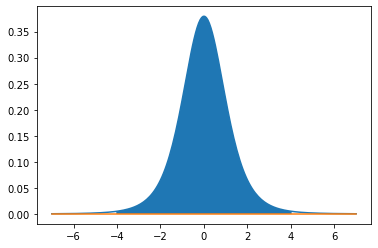

In [103]:
conf_level = 0.99
df = 5 # sample_size - 1
left, right = scipy.stats.t.interval(conf_level, df=df)
x = np.linspace(-7, 7, 200)
plt.plot(x, scipy.stats.t.pdf(x, df=df))
x_int = np.linspace(left, right, 200)
plt.fill_between(x_int, scipy.stats.t.pdf(x_int, df=df))
plt.plot(x, np.zeros_like(x))
print(left, right)

In [101]:
sample_size = 5
pop_mean = 3
pop_range = 4
inside_ci = 0
iterations = 10000
df = sample_size - 1
conf_level = 0.95

for i in range(iterations):
    
    sample = np.random.uniform(pop_mean - pop_range,
                           pop_mean + pop_range,
                           size=sample_size)

    stderr = np.std(sample, ddof=1) / np.sqrt(sample_size) 
    left, right = scipy.stats.t.interval(conf_level, df=df)
    r = right * stderr
    sample_mean = np.mean(sample)
    confint = (sample_mean - r, sample_mean + r)
    
    if confint[0] < pop_mean < confint[1]:
        inside_ci += 1
        
print(inside_ci / iterations)

0.9371


In [102]:
right

2.7764451051977987

In [107]:
# Quize

sample = [1, 2, 2, 4, 3, 2, 5]
stderr = np.std(sample, ddof=1) / np.sqrt(len(sample)) 
left, right = scipy.stats.norm.interval(0.99)
r = right * stderr
confint = (np.mean(sample) - r, np.mean(sample) + r)
print(confint)

(1.3706287487270912, 4.057942679844338)


In [108]:
sample = [1, 2, 2, 4, 3, 2, 5]
stderr = np.std(sample, ddof=1) / np.sqrt(len(sample)) 
left, right = scipy.stats.t.interval(0.99, df=(len(sample)-1))
r = right * stderr
confint = (np.mean(sample) - r, np.mean(sample) + r)
print(confint)

(0.780340992755814, 4.648230435815615)
